In [1]:
%matplotlib inline
import pandas as pd
from ipywidgets import widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
import sklearn.metrics as metrics
import pydotplus 
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
import pydotplus 
from sklearn import preprocessing

In [2]:
from sklearn.feature_selection import RFE

In [47]:
import seaborn as sns
from ipywidgets import interact
import tabpy_client
pd.options.mode.chained_assignment = None

In [7]:
normalized_data = pd.read_csv('data/Normalized_active.csv')

In [106]:
non_normalized_data = pd.read_csv('data/Non_Normalized_active.csv')

In [8]:
Churn_Men = normalized_data[normalized_data['gender_M']==1]
Churn_F = normalized_data[normalized_data['gender_M']==0]
Y_Male = Churn_Men['CaptainU_CHURN']
Y_Female = Churn_F['CaptainU_CHURN']

In [9]:
normalized_data.columns.values

array(['Unnamed: 0', 'NumYear', 'NumMonth', 'index_col', 'gender_F',
       'gender_M', 'Duration', 'EventsAttended',
       'EventsAttended_Frequency', 'Hits', 'Hits_Frequency',
       'Hprofileview', 'Hcoachimport', 'Hmessage', 'Hsearchhit',
       'Hcoacheval', 'Hvideoview', 'Hemailopen', 'Emails',
       'Emails_Frequency', 'EAthlete newsletter', 'Eathlete_new',
       'Eathlete_new_info_request', 'ECCNote', 'ECCNote_camp',
       'Ecoach_list_known_updated', 'ECoachEmailOpen', 'ECoachEval',
       'ECoachImport', 'ECoachSearchHit', 'ECoachVideoViewHit',
       'ECoachVisit', 'Ecolleges_going_to_the_event',
       'Efailed_subscription', 'EEmailsDigest', 'Eparent_new',
       'Eparent_welcome', 'Epost_event_email', 'Esms_update',
       'CollegeProspects', 'CollegeProspects_Frequency',
       'MessagesReceived', 'MessagesReceived_Frequency', 'MessagesSent',
       'MessagesSent_Frequency', 'monthly_price', 'Hit_Frequency_Pandas',
       'Hprofileview_Freq', 'Hcoachimport_Freq', 'Hm

In [10]:
# Conofounding Variables 
Churn_Men.drop(['CaptainU_CHURN','Unnamed: 0', 'NumYear', 'NumMonth', 'index_col',
    'Duration', 'EventsAttended',
       'EventsAttended_Frequency', 'Hits', 'Hits_Frequency',
       'Hprofileview', 'Hcoachimport', 'Hmessage', 'Hsearchhit',
       'Hcoacheval', 'Hvideoview', 'Hemailopen', 'Emails',
       'Emails_Frequency', 'EAthlete newsletter', 'Eathlete_new',
       'Eathlete_new_info_request', 'ECCNote', 'ECCNote_camp',
       'Ecoach_list_known_updated', 'ECoachEmailOpen', 'ECoachEval',
       'ECoachImport', 'ECoachSearchHit', 'ECoachVideoViewHit',
       'ECoachVisit', 'Ecolleges_going_to_the_event',
       'Efailed_subscription', 'EEmailsDigest', 'Eparent_new',
       'Eparent_welcome', 'Epost_event_email', 'Esms_update',
       'CollegeProspects','Efailed_subscription_Freq','ECoachImport_Freq','Eathlete_new_info_request_Freq'
                      ,'ECCNote_Freq','Esms_update_Freq'], axis = 1, inplace = True)
Churn_F.drop(['CaptainU_CHURN','Unnamed: 0', 'NumYear', 'NumMonth', 'index_col',
    'Duration', 'EventsAttended',
       'EventsAttended_Frequency', 'Hits', 'Hits_Frequency',
       'Hprofileview', 'Hcoachimport', 'Hmessage', 'Hsearchhit',
       'Hcoacheval', 'Hvideoview', 'Hemailopen', 'Emails',
       'Emails_Frequency', 'EAthlete newsletter', 'Eathlete_new',
       'Eathlete_new_info_request', 'ECCNote', 'ECCNote_camp',
       'Ecoach_list_known_updated', 'ECoachEmailOpen', 'ECoachEval',
       'ECoachImport', 'ECoachSearchHit', 'ECoachVideoViewHit',
       'ECoachVisit', 'Ecolleges_going_to_the_event',
       'Efailed_subscription', 'EEmailsDigest', 'Eparent_new',
       'Eparent_welcome', 'Epost_event_email', 'Esms_update',
       'CollegeProspects','Efailed_subscription_Freq','ECoachImport_Freq','Eathlete_new_info_request_Freq'
                      ,'ECCNote_Freq','Esms_update_Freq'], axis = 1, inplace = True)

/Users/jamesmwakichako/Documents/Kaggle/kaggle_py/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesmwakichako/Documents/Kaggle/kaggle_py/lib/python3.5/site-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
Churn_Men.columns.values

array(['gender_F', 'gender_M', 'CollegeProspects_Frequency',
       'MessagesReceived', 'MessagesReceived_Frequency', 'MessagesSent',
       'MessagesSent_Frequency', 'monthly_price', 'Hit_Frequency_Pandas',
       'Hprofileview_Freq', 'Hcoachimport_Freq', 'Hmessage_Freq',
       'Hsearchhit_Freq', 'Hcoacheval_Freq', 'Hemailopen_Freq',
       'Ecoach_list_known_updated_Freq', 'ECoachEmailOpen_Freq',
       'ECoachEval_Freq', 'ECoachSearchHit_Freq', 'ECoachVisit_Freq',
       'Ecolleges_going_to_the_event_Freq', 'EEmailsDigest_Freq',
       'Epost_event_email_Freq'], dtype=object)

In [12]:
Churn_Men.drop(['gender_F', 'gender_M'], axis = 1, inplace = True)
Churn_F.drop(['gender_F', 'gender_M'], axis = 1, inplace = True)

/Users/jamesmwakichako/Documents/Kaggle/kaggle_py/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/jamesmwakichako/Documents/Kaggle/kaggle_py/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [13]:
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(Churn_Men, Y_Male, test_size=0.20, random_state=42)
X_train_F, X_test_F, y_train_F, y_test_F = train_test_split(Churn_F, Y_Female, test_size=0.20, random_state=42)

In [17]:
import math
import numpy as np
import pandas as pd
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score, cross_val_predict, StratifiedKFold 
from sklearn import preprocessing, metrics, svm, ensemble
from sklearn.metrics import accuracy_score, classification_report

/Users/jamesmwakichako/Documents/Kaggle/kaggle_py/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jamesmwakichako/Documents/Kaggle/kaggle_py/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [19]:
# 10 fold stratified cross validation
kf = StratifiedKFold(y_train_M, n_folds=10, random_state=None, shuffle=True)

# Define the parameter grid to use for tuning the Support Vector Machine
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# Pick the goal you're optimizing for e.g. precision if you prefer fewer false-positives
# recall if you prefer fewer false-negatives. For demonstration purposes let's pick several
# Note that the final model selection will be based on the last item in the list
scoringmethods = ['f1','accuracy','precision', 'recall','roc_auc']

In [20]:
# Logistic regression with 10 fold stratified cross-validation using model specific cross-validation in scikit-learn
lgclf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10))),penalty='l2',scoring='roc_auc',cv=kf)
lgclf.fit(X_train_M, y_train_M)
y_pred = lgclf.predict(X_test_M)

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")
print(classification_report(y_test_M, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test_M, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test_M, y_pred))

Classification report:
             precision    recall  f1-score   support

          0       0.84      0.89      0.86      1004
          1       0.72      0.63      0.67       465

avg / total       0.80      0.81      0.80      1469

Accuracy: 0.807
Aucroc: 0.759


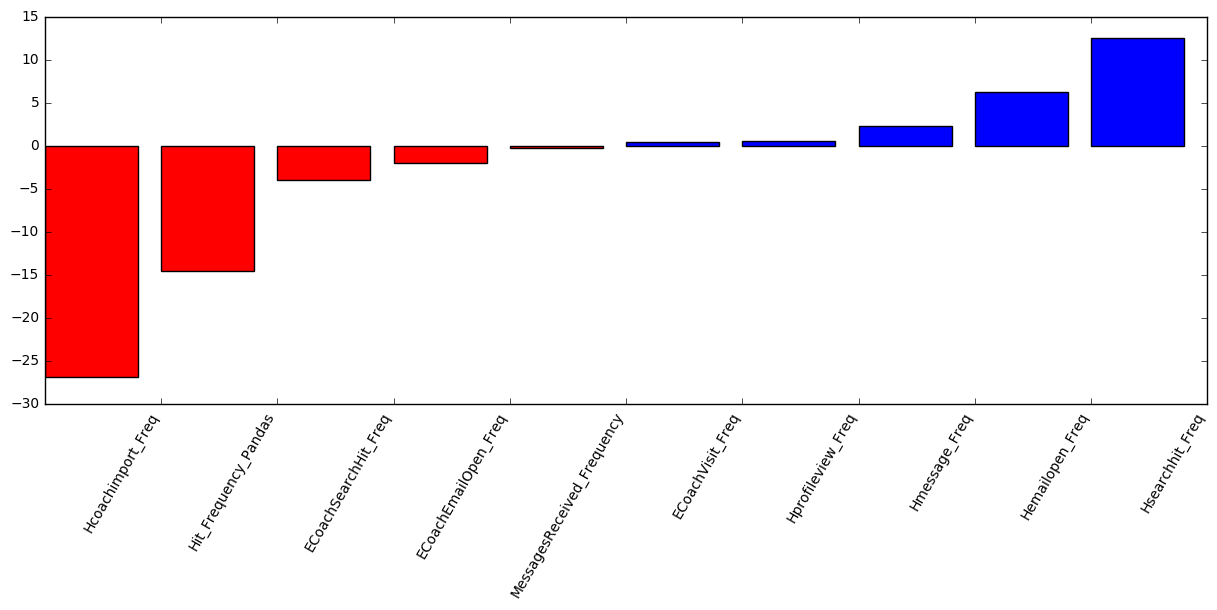

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=5):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()
#cv = CountVectorizer()
#cv.fit(data)
#print len(cv.vocabulary_)
#print cv.get_feature_names()
#X_train = cv.transform(data)

lgclf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10))),penalty='l2',scoring='roc_auc',cv=kf)
lgclf.fit(X_train_M, y_train_M)
plot_coefficients(lgclf, X_test_M.columns.values)

In [22]:
# Define the parameter grid to use for tuning the Gradient Boosting Classifier
gridparams = dict(learning_rate=[0.01, 0.1],loss=['deviance','exponential'])

# Parameters we're not tuning for this classifier
params = {'n_estimators': 1500, 'max_depth': 4}

# Setup for grid search with cross-validation for Gradient Boosting Classifier
# n_jobs=-1 for parallel execution using all available cores
gbclf = GridSearchCV(ensemble.GradientBoostingClassifier(**params), gridparams, cv=kf, scoring='roc_auc',n_jobs=-1)
gbclf.fit(X_train_M, y_train_M)

# Show the definition of the best model
print("Best model:")
print(gbclf.best_estimator_)
print("")

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")    
y_pred = gbclf.predict(X_test_M)
print(classification_report(y_test_M, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test_M, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test_M, y_pred))

Best model:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

Classification report:
             precision    recall  f1-score   support

          0       0.87      0.90      0.89      1004
          1       0.77      0.72      0.74       465

avg / total       0.84      0.84      0.84      1469

Accuracy: 0.841
Aucroc: 0.807


In [26]:
# 10 fold stratified cross validation
kf = StratifiedKFold(y_train_F, n_folds=10, random_state=None, shuffle=True)

# Define the parameter grid to use for tuning the Support Vector Machine
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# Pick the goal you're optimizing for e.g. precision if you prefer fewer false-positives
# recall if you prefer fewer false-negatives. For demonstration purposes let's pick several
# Note that the final model selection will be based on the last item in the list
scoringmethods = ['f1','accuracy','precision', 'recall','roc_auc']

In [27]:
# Logistic regression with 10 fold stratified cross-validation using model specific cross-validation in scikit-learn
lgclf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10))),penalty='l2',scoring='roc_auc',cv=kf)
lgclf.fit(X_train_F, y_train_F)
y_pred = lgclf.predict(X_test_F)

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")
print(classification_report(y_test_F, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test_F, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test_F, y_pred))

Classification report:
             precision    recall  f1-score   support

          0       0.80      0.78      0.79       990
          1       0.72      0.75      0.74       765

avg / total       0.77      0.76      0.77      1755

Accuracy: 0.765
Aucroc: 0.763


In [28]:
print(len(y_train_F[y_train_F==0]))
print(len(y_train_F[y_train_F==1]))

4076
2944


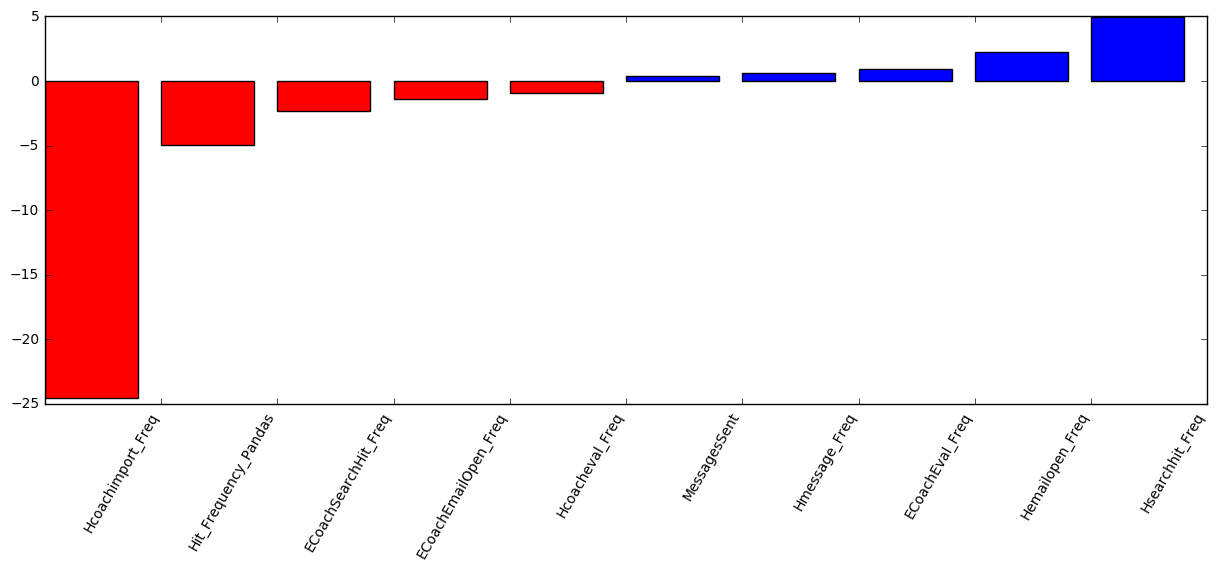

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=5):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()
#cv = CountVectorizer()
#cv.fit(data)
#print len(cv.vocabulary_)
#print cv.get_feature_names()
#X_train = cv.transform(data)

lgclf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10))),penalty='l2',scoring='roc_auc',cv=kf)
lgclf.fit(X_train_F, y_train_F)
plot_coefficients(lgclf, X_test_F.columns.values)

In [32]:
# Define the parameter grid to use for tuning the Gradient Boosting Classifier
gridparams = dict(learning_rate=[0.01, 0.1],loss=['deviance','exponential'])

# Parameters we're not tuning for this classifier
params = {'n_estimators': 1500, 'max_depth': 4}

# Setup for grid search with cross-validation for Gradient Boosting Classifier
# n_jobs=-1 for parallel execution using all available cores
gbclf = GridSearchCV(ensemble.GradientBoostingClassifier(**params), gridparams, cv=kf, scoring='roc_auc',n_jobs=-1)
gbclf.fit(X_train_F, y_train_F)

# Show the definition of the best model
print("Best model:")
print(gbclf.best_estimator_)
print("")

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")    
y_pred = gbclf.predict(X_test_F)
print(classification_report(y_test_F, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test_F, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test_F, y_pred))

Best model:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='exponential', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

Classification report:
             precision    recall  f1-score   support

          0       0.85      0.81      0.83       990
          1       0.76      0.81      0.79       765

avg / total       0.81      0.81      0.81      1755

Accuracy: 0.809
Aucroc: 0.809


In [50]:
Deploy_X_train_M = X_train_M[['ECoachImport_Freq', 'ECoachSearchHit_Freq' ,'Emails_Frequency',
 'Hcoachimport_Freq', 'ECoachEmailOpen_Freq','Emails', 'ECoachVisit_Freq', 'Hmessage_Freq',
 'Hsearchhit_Freq', 'Hits_Frequency']]
Deploy_X_test_M = X_test_M[['ECoachImport_Freq', 'ECoachSearchHit_Freq' ,'Emails_Frequency',
 'Hcoachimport_Freq', 'ECoachEmailOpen_Freq','Emails', 'ECoachVisit_Freq', 'Hmessage_Freq',
 'Hsearchhit_Freq', 'Hits_Frequency']]

In [14]:
print(X_train_F.shape)
print(X_test_F.shape)

(7020, 21)
(1755, 21)


In [92]:
#print(Deploy_X_train_M.shape)
#print(Deploy_X_test_M.shape)

In [15]:
print(len(y_train_M[y_train_M==0]))
print(len(y_train_M[y_train_M==1]))
print("----Churning in Female------")
print(len(y_train_F[y_train_F==0]))
print(len(y_train_F[y_train_F==1]))

4004
1869
----Churning in Female------
4076
2944


In [16]:
print(len(y_test_M[y_test_M==1]))
print(len(y_test_M[y_test_M==0]))
print("----Churning in Female------")
print(len(y_test_F[y_test_F==1]))
print(len(y_test_F[y_test_F==0]))

465
1004
----Churning in Female------
765
990


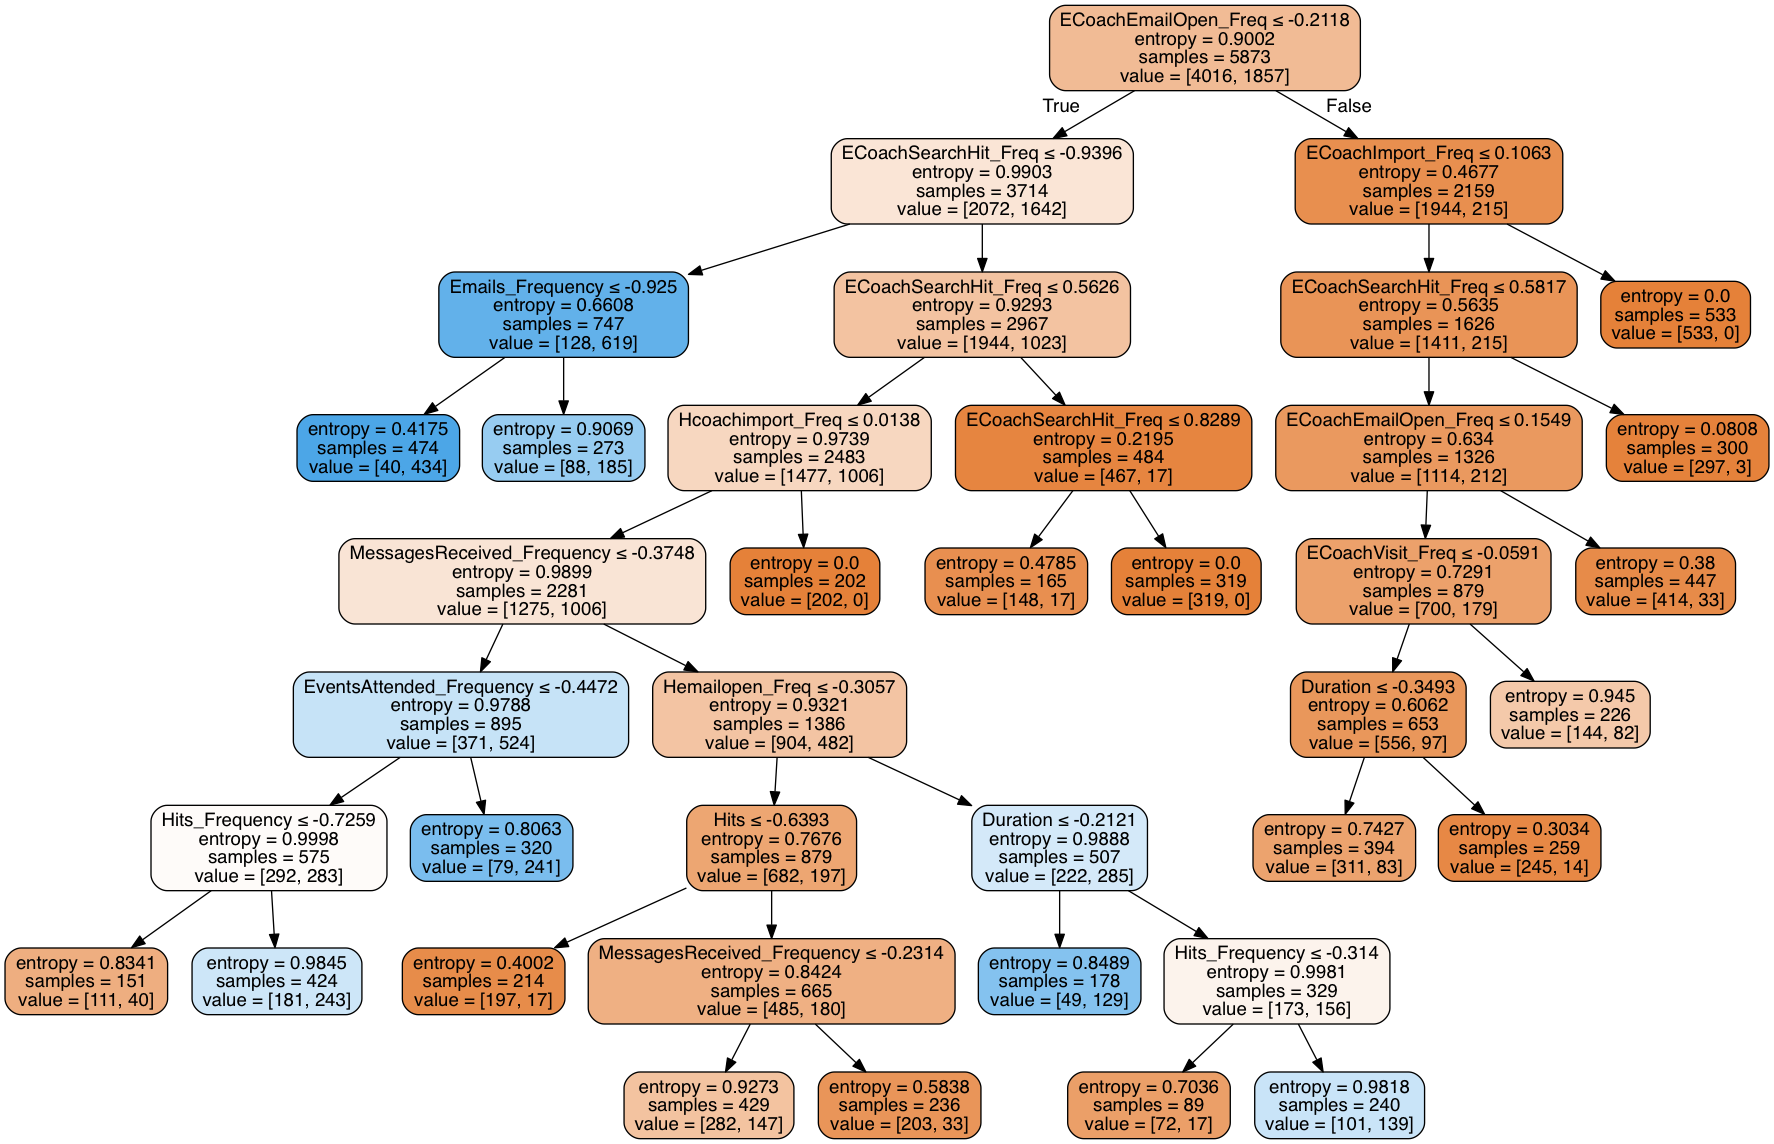

In [14]:
clf = tree.DecisionTreeClassifier(max_depth=7,max_leaf_nodes=20, criterion='entropy')
clf_M = clf.fit(X_train_M,y_train_M)
dot_data = tree.export_graphviz(clf_M, out_file=None, 
                         feature_names=Churn_Men.columns,    
                         filled=True, rounded=True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

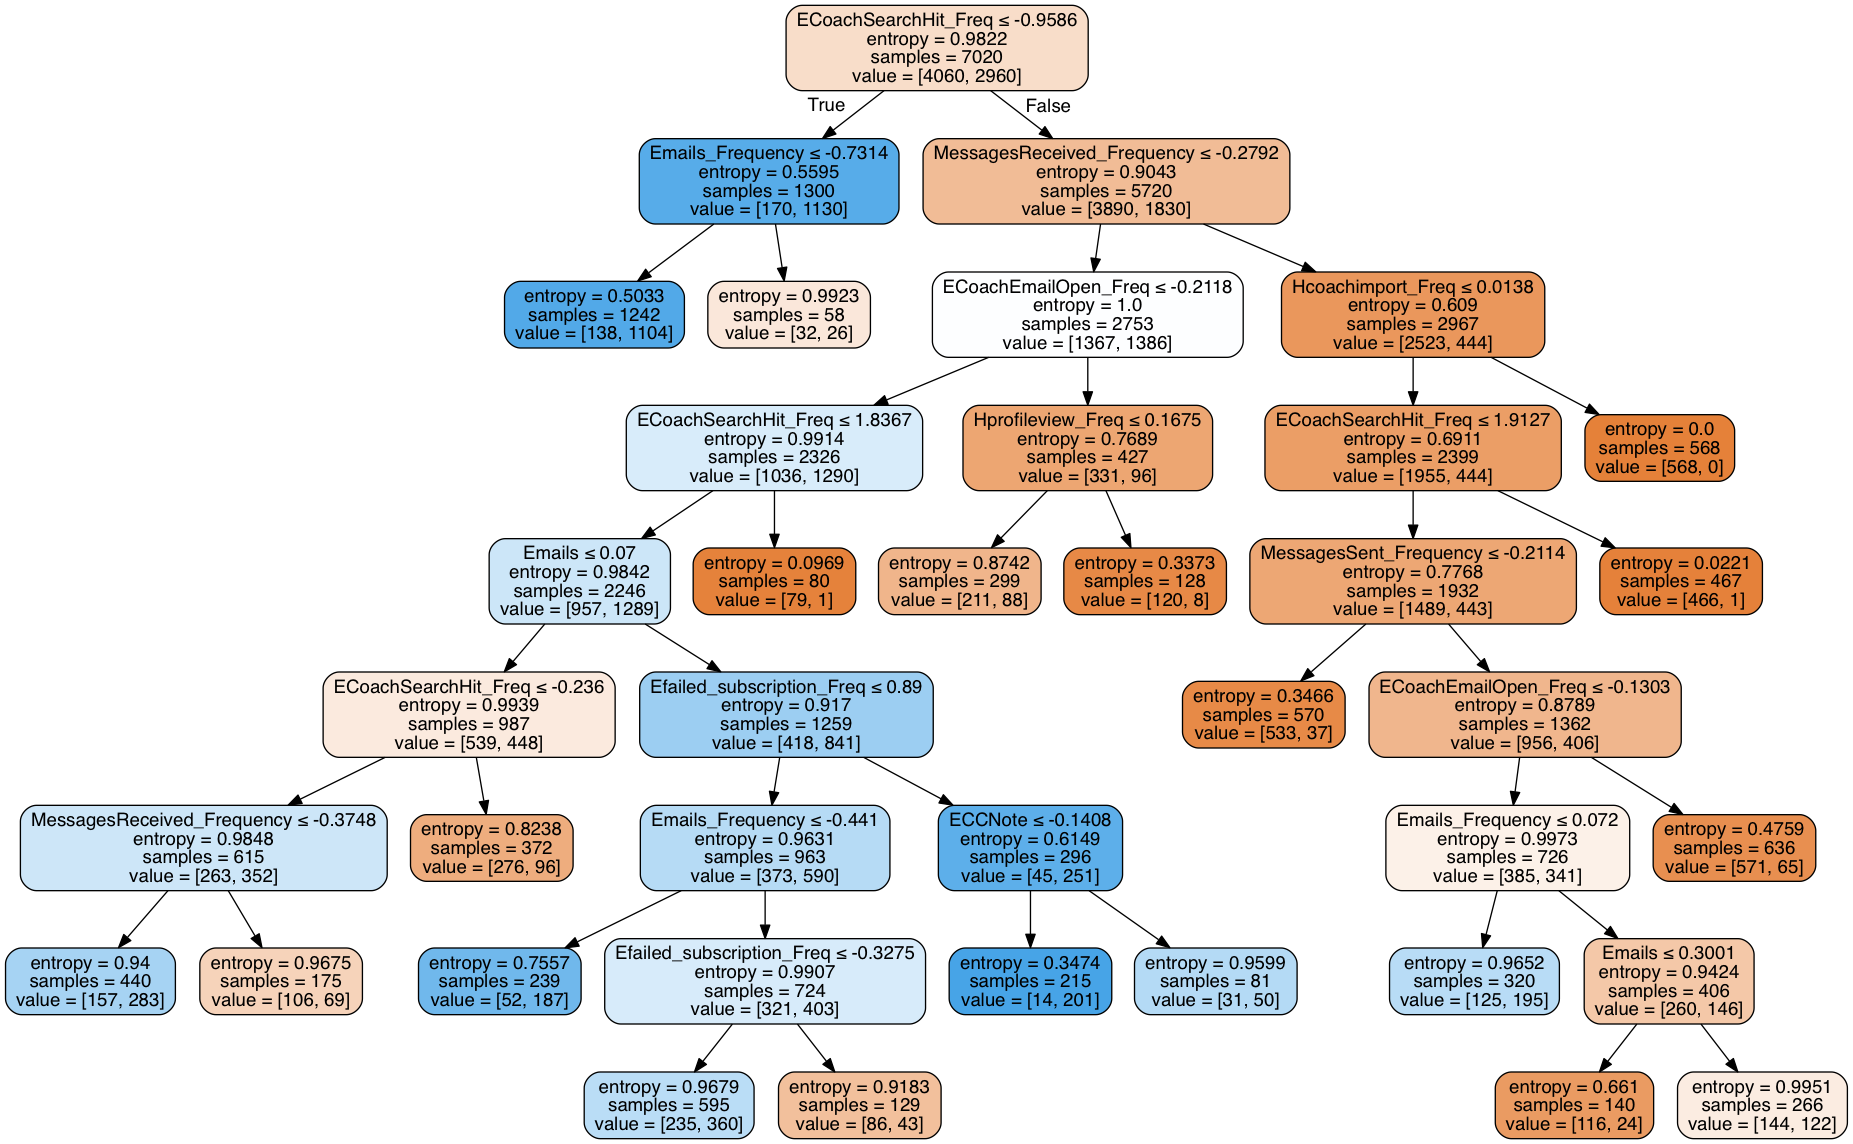

In [15]:
clf = tree.DecisionTreeClassifier(max_depth=7,max_leaf_nodes=20, criterion='entropy')
clf_F = clf.fit(X_train_F,y_train_F )
dot_data = tree.export_graphviz(clf_F, out_file=None, 
                         feature_names=Churn_F.columns,    
                         filled=True, rounded=True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [94]:
clf_m = tree.DecisionTreeClassifier(criterion='entropy')
clf_M = clf_m.fit(X_train_M,y_train_M )
prediction_dt_M = clf_M.predict(X_test_M)
accuracy = clf_M.score(X_test_M, y_test_M)
precision = metrics.precision_score(y_test_M, prediction_dt_M)
recall = metrics.recall_score(y_test_M, prediction_dt_M)
F1 = metrics.f1_score(y_test_M, prediction_dt_M)
print("Accuracy is {}".format(accuracy))
print("Precision is {}".format(precision))
print("Recall is {}".format(recall))
print("F1 is {}".format(F1))

Accuracy is 0.780803267529
Precision is 0.641025641026
Recall is 0.698924731183
F1 is 0.668724279835


In [75]:
clf_f = tree.DecisionTreeClassifier(criterion='entropy')
clf_F = clf_f.fit(X_train_F,y_train_F )
prediction_dt_F = clf_F.predict(X_test_F)
accuracy = clf_F.score(X_test_F, y_test_F)
precision = metrics.precision_score(y_test_F, prediction_dt_F)
recall = metrics.recall_score(y_test_F, prediction_dt_F)
F1 = metrics.f1_score(y_test_F, prediction_dt_F)
print("-------------Evaluation Metric for Girls----")
print("Accuracy is {}".format(accuracy))
print("Precision is {}".format(precision))
print("Recall is {}".format(recall))
print("F1 is {}".format(F1))

-------------Evaluation Metric for Girls----
Accuracy is 0.780626780627
Precision is 0.751322751323
Recall is 0.742483660131
F1 is 0.746877054569


In [95]:
logic_m =LogisticRegression()
logic_M = logic_m.fit(X_train_M,y_train_M)
prediction_l_M = logic_M.predict(X_test_M)
accuracy = logic_M.score(X_test_M, y_test_M)
precision = metrics.precision_score(y_test_M, prediction_l_M)
recall = metrics.recall_score(y_test_M, prediction_l_M)
F1 = metrics.f1_score(y_test_M, prediction_l_M)
print("Accuracy is {}".format(accuracy))
print("Precision is {}".format(precision))
print("Recall is {}".format(recall))
print("F1 is {}".format(F1))


Accuracy is 0.805309734513
Precision is 0.703872437358
Recall is 0.664516129032
F1 is 0.683628318584


In [96]:
logic_f =LogisticRegression()
logic_F = logic_f.fit(X_train_F,y_train_F)
prediction_l_F = logic_F.predict(X_test_F)
accuracy = logic_F.score(X_test_F, y_test_F)
precision = metrics.precision_score(y_test_F, prediction_l_F)
recall = metrics.recall_score(y_test_F, prediction_l_F)
F1 = metrics.f1_score(y_test_F, prediction_l_F)
print("Accuracy is {}".format(accuracy))
print("Precision is {}".format(precision))
print("Recall is {}".format(recall))
print("F1 is {}".format(F1))
confusion_matrix(y_test_F, prediction_l_F)

Accuracy is 0.782336182336
Precision is 0.734969325153
Recall is 0.783006535948
F1 is 0.758227848101


array([[774, 216],
       [166, 599]])

['ECoachImport_Freq' 'Hcoachimport_Freq' 'ECoachSearchHit_Freq'
 'Emails_Frequency' 'ECCNote_Freq' 'Hemailopen_Freq' 'ECoachEmailOpen_Freq'
 'Ecolleges_going_to_the_event_Freq' 'Hcoacheval_Freq' 'Duration'
 'Eparent_welcome' 'EAthlete newsletter' 'CollegeProspects_Frequency'
 'EventsAttended_Frequency' 'Efailed_subscription_Freq'
 'Epost_event_email_Freq' 'ECoachEval_Freq' 'Hits_Frequency'
 'ECoachVisit_Freq' 'Hsearchhit_Freq']


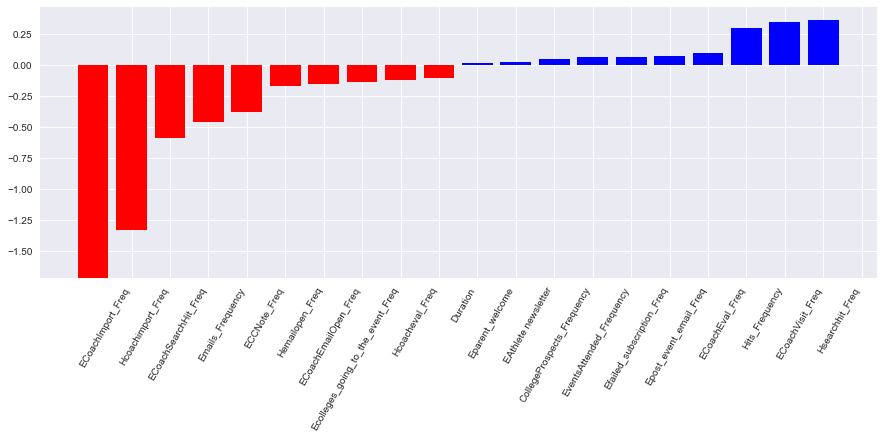

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=10):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 print(feature_names[top_coefficients])
 plt.show()

svm = LinearSVC()
svm.fit(X_train_F, y_train_F)
plot_coefficients(svm, X_train_F.columns.values)

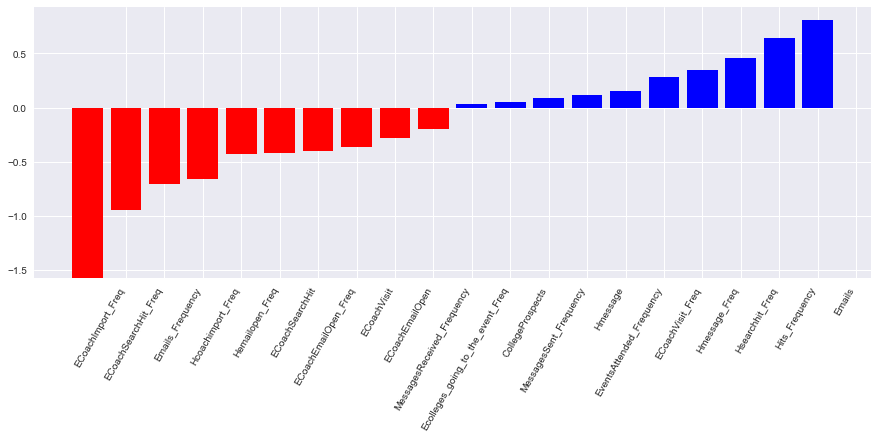

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=10):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()

svm = LinearSVC()
svm.fit(X_train_M, y_train_M)
plot_coefficients(svm, X_train_M.columns.values)

----Logistic Regression Females


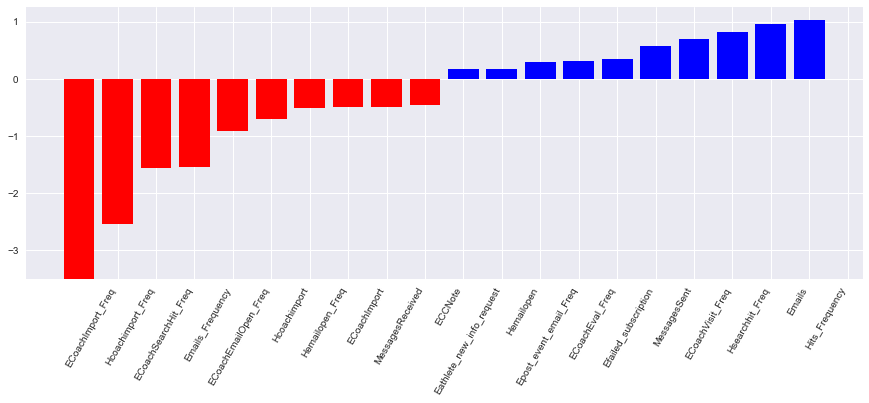

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=10):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()
print("----Logistic Regression Females")
plot_coefficients(logic_F, X_test_F.columns.values)

------logistic regression Males ------


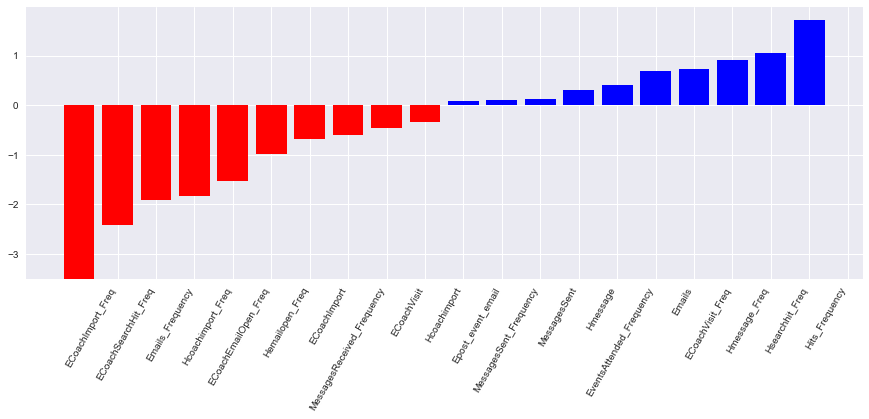

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=10):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 #print(feature_names[top_coefficients])
 plt.show()
print("------logistic regression Males ------")
plot_coefficients(logic_M, X_test_M.columns.values)

Confusion matrix, without normalization
[[792 214]
 [196 553]]
Normalized confusion matrix
[[ 0.79  0.21]
 [ 0.26  0.74]]


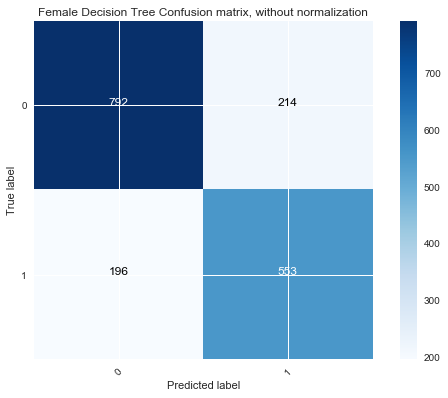

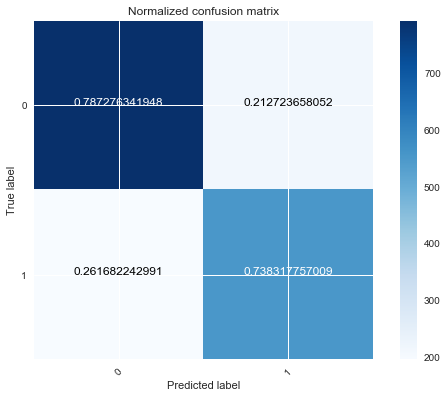

In [24]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_F, prediction_dt_F)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Female Decision Tree Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[795 211]
 [138 611]]
Normalized confusion matrix
[[ 0.79  0.21]
 [ 0.18  0.82]]


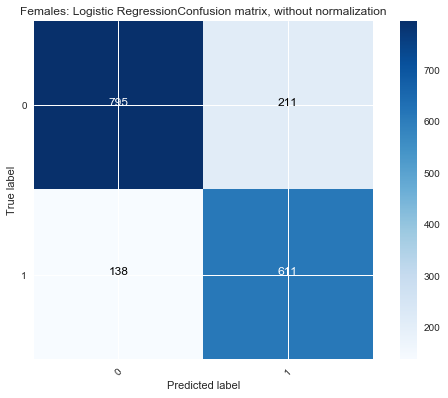

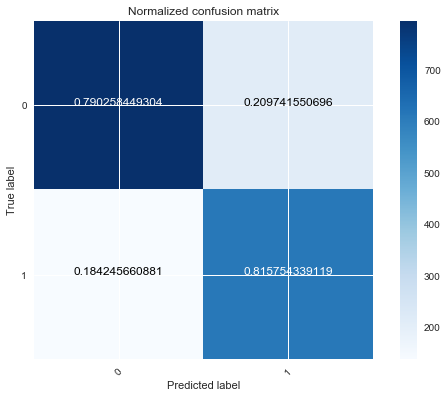

In [25]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_F, prediction_l_F)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Females: Logistic RegressionConfusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[841 151]
 [163 314]]
Normalized confusion matrix
[[ 0.85  0.15]
 [ 0.34  0.66]]


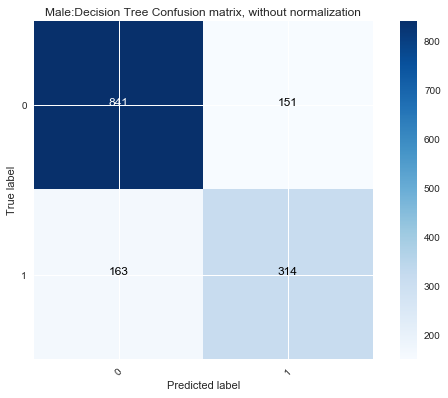

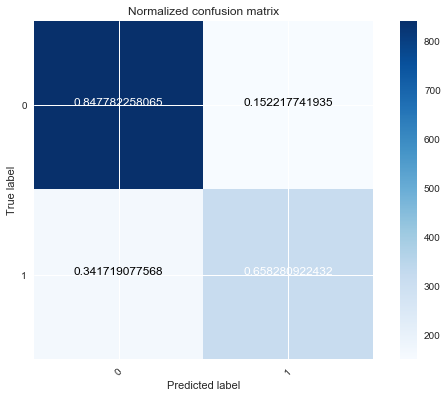

In [26]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_M, prediction_dt_M)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Male:Decision Tree Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[885 107]
 [178 299]]
Normalized confusion matrix
[[ 0.89  0.11]
 [ 0.37  0.63]]


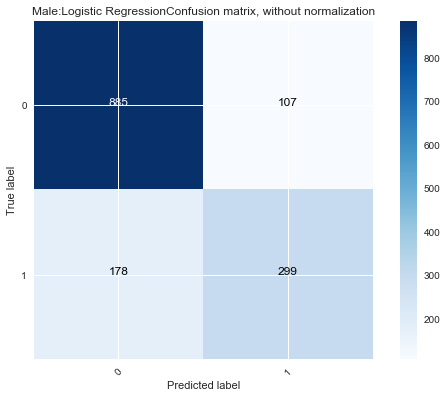

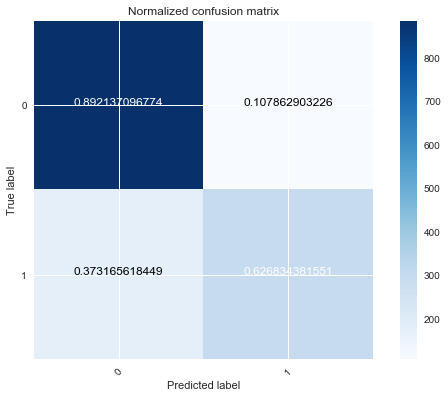

In [27]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_M, prediction_l_M)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Male:Logistic RegressionConfusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [28]:
classifier = SVC(kernel='linear', C=2.0)
svc_M = classifier.fit(X_train_M, y_train_M)
prediction_svc_M = svc_M.predict(X_test_M)
accuracy = svc_M.score(X_test_M, y_test_M)
precision = metrics.precision_score(y_test_M, prediction_svc_M)
recall = metrics.recall_score(y_test_M, prediction_svc_M)
F1 = metrics.f1_score(y_test_M, prediction_svc_M)
print("Accuracy is {}".format(accuracy))
print("Precision is {}".format(precision))
print("Recall is {}".format(recall))
print("F1 is {}".format(F1))

Accuracy is 0.799863852961
Precision is 0.723716381418
Recall is 0.620545073375
F1 is 0.668171557562


In [29]:
classifier = SVC(kernel='linear', C=1.0)
svc_F = classifier.fit(X_train_F, y_train_F)
prediction_svc_F = svc_F.predict(X_test_F)
accuracy = svc_F.score(X_test_F, y_test_F)
precision = metrics.precision_score(y_test_F, prediction_svc_F)
recall = metrics.recall_score(y_test_F, prediction_svc_F)
F1 = metrics.f1_score(y_test_F, prediction_svc_F)
print("Accuracy is {}".format(accuracy))
print("Precision is {}".format(precision))
print("Recall is {}".format(recall))
print("F1 is {}".format(F1))

Accuracy is 0.807977207977
Precision is 0.744075829384
Recall is 0.838451268358
F1 is 0.788449466416


Confusion matrix, without normalization
[[790 216]
 [121 628]]
Normalized confusion matrix
[[ 0.79  0.21]
 [ 0.16  0.84]]


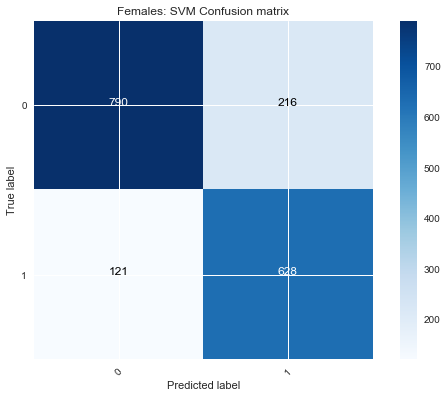

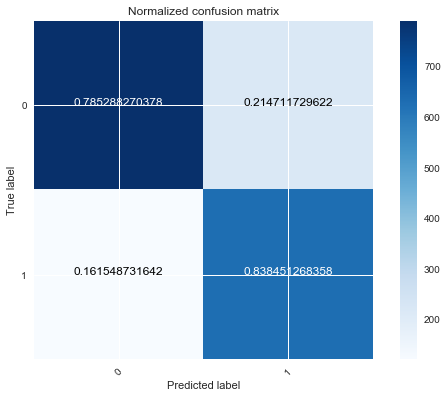

In [30]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_F, prediction_svc_F)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Females: SVM Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[879 113]
 [181 296]]
Normalized confusion matrix
[[ 0.89  0.11]
 [ 0.38  0.62]]


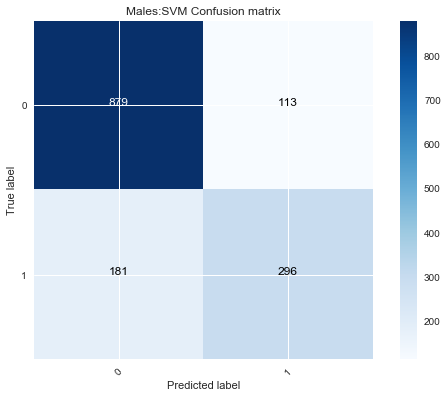

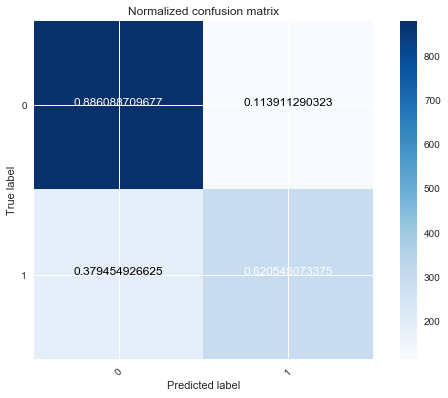

In [31]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_M, prediction_svc_M)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Males:SVM Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Removing confounding variables 